# Ausführung: Korrelation

In [149]:
import pandas as pd
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

In [150]:
data = pd.read_pickle("./data/data.pkl")
data.shape[0]

102

In [207]:
%%html
<style>
.p-Widget.jp-Cell.jp-Notebook-cell {
    width: 100%;
    margin: auto;
}
</style>

In [151]:
data.tail(15)

close   high    low   open  volumefrom     volumeto  total_tweets  \
date                                                                            
2019-02-09  44.61  46.00  42.34  43.13   940555.46  41263058.94          6350   
2019-02-10  46.86  47.42  42.12  44.61   954491.53  43130681.30          5285   
2019-02-11  42.85  46.92  41.72  46.86   848151.67  37222377.28          4048   
2019-02-12  43.93  44.64  41.88  42.85   541440.71  23571151.58          3989   
2019-02-13  41.69  44.76  40.72  43.93   571936.43  24294209.80          4964   
2019-02-14  41.39  42.41  40.35  41.69   389800.19  16171844.66          4861   
2019-02-15  42.69  44.53  41.30  41.39   529622.00  22527408.54          3870   
2019-02-16  43.56  44.45  42.40  42.69   421760.51  18426867.17          3787   
2019-02-17  44.06  45.20  42.77  43.56   493424.90  21549854.45          3031   
2019-02-18  47.88  49.23  43.70  44.06  1134479.77  52653038.49          4137   
2019-02-19  47.35  49.27  46.92  47.88   601822.13  28910849.45          4298   
2019-02-20  51.68  52.43  46.60  47.35   914233.51  46073399.51          4208   
2019-02-21  48.99  51.83  48.04  51.68   597830.62  29601563.22          3543   
2019-02-22  49.64  50.08  48.25  48.99   453142.57  22370701.89          4395   
2019-02-23  51.61  52.16  48.27  49.64   454454.93  22863434.51          1104   

            rule_positive  rule_neutral  rule_negative  rule_sum  ml_positive  \
date                                                                            
2019-02-09            668           614            244    1532.0          616   
2019-02-10            602           470            199    1316.0          522   
2019-02-11            476           434            122    1088.0          442   
2019-02-12            413           396            119     900.0          370   
2019-02-13            424           378            133    1006.0          400   
2019-02-14            333           226             96     890.0          289   
2019-02-15            415           362            100    1054.0          375   
2019-02-16            394           354            127     974.0          365   
2019-02-17            301           244             93     803.0          280   
2019-02-18            459           393            137    1176.0          395   
2019-02-19            350           367            103     909.0          316   
2019-02-20            459           449            105    1271.0          423   
2019-02-21            380           321             92     915.0          369   
2019-02-22            379           345             95    1038.0          354   
2019-02-23             91            69             17     249.0           77   

            ml_neutral  ml_negative      ml_sum  ml_rule_positive  \
date                                                                
2019-02-09         714          196  963.095558               330   
2019-02-10         594          155  805.672387               302   
2019-02-11         491           99  667.686031               240   
2019-02-12         457          101  590.427923               190   
2019-02-13         437           98  602.015677               199   
2019-02-14         309           57  427.365268               169   
2019-02-15         406           96  566.292923               202   
2019-02-16         407          103  553.475100               193   
2019-02-17         294           64  412.190424               159   
2019-02-18         494          100  631.088031               223   
2019-02-19         416           88  519.375578               164   
2019-02-20         479          111  644.677892               218   
2019-02-21         337           87  520.434704               210   
2019-02-22         391           74  539.601655               191   
2019-02-23          85           15  119.438471                51   

            ml_rule_neutral  ml_rule_negative  
date                              

In [152]:
#data.drop(data.index[:20], inplace=True)

In [153]:
data.shape

(102, 18)

In [154]:
data = data[(data.index > '2018-11-13')]
data = data[(data.index < '2019-02-21')]

In [155]:
data.shape

(95, 18)

## Enrich Data

In [156]:
def add_daily_changerate(data):
    for index, row in data.iterrows():
        change = row['close'] - row['open']
        changerate = (change * 100) / row['open']
        data.loc[index, 'day_changerate'] = changerate
add_daily_changerate(data)

In [157]:
def add_daily_volume(data):
    for index, row in data.iterrows():
        vol = row['volumefrom'] - row['volumeto']
        data.loc[index, 'day_volume'] = vol
add_daily_volume(data)

In [158]:
def difference_ml(data):
    for index, row in data.iterrows():
        vol = row['ml_positive'] - row['ml_negative']
        data.loc[index, 'ml_diff'] = vol
difference_ml(data)

In [159]:
def difference_rule(data):
    for index, row in data.iterrows():
        vol = row['rule_positive'] - row['rule_negative']
        data.loc[index, 'rule_diff'] = vol
difference_rule(data)

In [160]:
def difference_ml_rule(data):
    for index, row in data.iterrows():
        vol = row['ml_rule_positive'] - row['ml_rule_negative']
        data.loc[index, 'ml_rule_diff'] = vol
difference_ml_rule(data)

In [161]:
data.head(1)

close   high    low   open  volumefrom     volumeto  total_tweets  \
date                                                                            
2018-11-14  43.38  50.48  41.12  49.42   962763.52  42450676.06          1139   

            rule_positive  rule_neutral  rule_negative      ...       \
date                                                        ...        
2018-11-14             84           107             46      ...        

            ml_negative      ml_sum  ml_rule_positive  ml_rule_neutral  \
date                                                                     
2018-11-14           25  154.238878                55               50   

            ml_rule_negative  day_changerate   day_volume  ml_diff  rule_diff  \
date                                                                            
2018-11-14                14      -12.221773 -41487912.54     88.0       38.0   

            ml_rule_diff  
date                      
2018-11-14          41.0  

[1 rows x 23 columns]

## Data count

In [162]:
print("Totale Anzahl Tweets: {0}".format(data['total_tweets'].sum()))
print("Nicht Noise: {0}".format(data['rule_positive'].sum() + data['rule_negative'].sum() + data['rule_neutral'].sum()))

Totale Anzahl Tweets: 173355
Nicht Noise: 38192


## Correlations

In [163]:
from scipy.stats import pearsonr

In [164]:
target = 'close'
sources = ['total_tweets', 'rule_positive', 'rule_neutral', 'rule_negative', 'ml_positive', 'ml_neutral', 'ml_negative']

for source in sources:
    (corr_coef, p_value) = pearsonr(data[target], data[source])
    print("Korrelation zu '{0}': {1} - p: {2}".format(source, format(corr_coef, '.2f'), p_value))

Korrelation zu 'total_tweets': 0.60 - p: 1.078348471626739e-10
Korrelation zu 'rule_positive': 0.61 - p: 4.524948673162398e-11
Korrelation zu 'rule_neutral': 0.59 - p: 2.848487136269132e-10
Korrelation zu 'rule_negative': 0.54 - p: 1.2737187218607552e-08
Korrelation zu 'ml_positive': 0.62 - p: 1.5278952212285206e-11
Korrelation zu 'ml_neutral': 0.59 - p: 2.1807052556151534e-10
Korrelation zu 'ml_negative': 0.52 - p: 8.745148808070157e-08


In [165]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

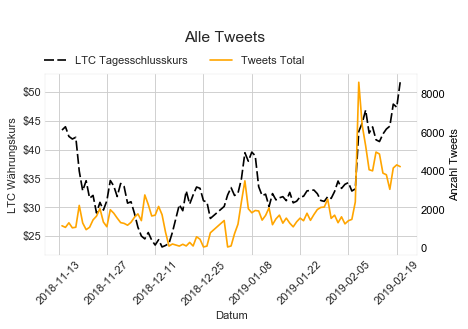

In [147]:
plt.style.use('seaborn-whitegrid')
matplt.rcParams['axes.linewidth'] = 0.1 #set the value globally

fig = plt.figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Alle Tweets', fontsize=14, y=1.06)
ax1 = fig.add_subplot(111)
plt.plot(data.index, data.close, color='black', dashes=[6, 2], label='LTC Tagesschlusskurs')
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
ax1.set_ylabel('LTC Währungskurs')
ax1.set_xlabel('Datum')

ax2 = ax1.twinx()
ax2.plot(data.index, data.total_tweets, color='orange', label='Tweets Total')
ax2.set_ylabel('Anzahl Tweets', color='black')
ax2.grid(False)
for tl in ax2.get_yticklabels():
    tl.set_color('black')

fig.legend(loc=2, ncol=2, bbox_to_anchor=(0.07,1.18))
plt.show()

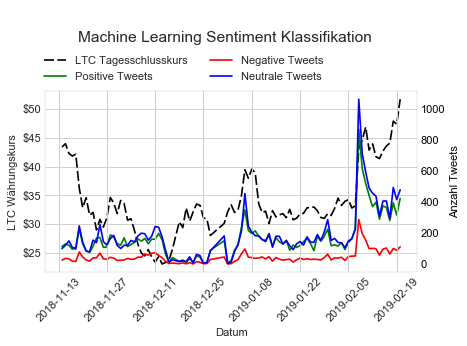

In [140]:
plt.style.use('seaborn-whitegrid')
matplt.rcParams['axes.linewidth'] = 0.1 #set the value globally

fig = plt.figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Machine Learning Sentiment Klassifikation', fontsize=14, y=1.13)
ax1 = fig.add_subplot(111)
plt.plot(data.index, data.close, color='black', dashes=[6, 2], label='LTC Tagesschlusskurs')
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
ax1.set_ylabel('LTC Währungskurs')
ax1.set_xlabel('Datum')

ax2 = ax1.twinx()
ax2.plot(data.index, data.ml_positive, color='green', label='Positive Tweets')
ax2.set_ylabel('Anzahl Tweets', color='black')
ax2.grid(False)
for tl in ax2.get_yticklabels():
    tl.set_color('black')
    
#ax3 = ax2.twiny()
#ax3.plot(data.index, data.ml_positive, color='green', label='Positive Tweets')
#ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax3 = ax2.twiny()
ax3.plot(data.index, data.ml_negative, color='red', label='Negative Tweets')
ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax4 = ax2.twiny()
ax4.plot(data.index, data.ml_neutral, color='blue', label='Neutrale Tweets')
ax4.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

fig.legend(loc=2, ncol=2, bbox_to_anchor=(0.07,1.25))
plt.show()

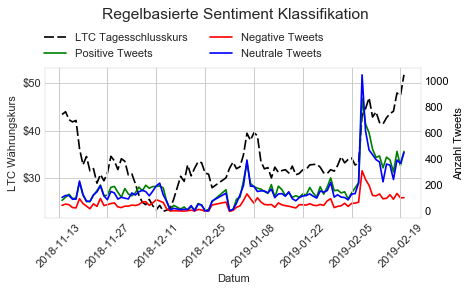

In [148]:
plt.style.use('seaborn-whitegrid')
matplt.rcParams['axes.linewidth'] = 0.1 #set the value globally

fig = plt.figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Regelbasierte Sentiment Klassifikation', fontsize=14, y=1.2)
ax1 = fig.add_subplot(111)
plt.plot(data.index, data.close, color='black', dashes=[6, 2], label='LTC Tagesschlusskurs')
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
ax1.set_ylabel('LTC Währungskurs')
ax1.set_xlabel('Datum')

ax2 = ax1.twinx()
ax2.plot(data.index, data.rule_positive, color='green', label='Positive Tweets')
ax2.set_ylabel('Anzahl Tweets', color='black')
ax2.grid(False)
for tl in ax2.get_yticklabels():
    tl.set_color('black')
    
#ax3 = ax2.twiny()
#ax3.plot(data.index, data.ml_positive, color='green', label='Positive Tweets')
#ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax3 = ax2.twiny()
ax3.plot(data.index, data.rule_negative, color='red', label='Negative Tweets')
ax3.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')

ax4 = ax2.twiny()
ax4.plot(data.index, data.rule_neutral, color='blue', label='Neutrale Tweets')
ax4.tick_params(top='off', bottom='off', left='off', right='off', labeltop='off', labelbottom='off', labelleft='off', labelright='off')
plt.tight_layout()
fig.legend(loc=2, ncol=2, bbox_to_anchor=(0.07,1.12))
plt.show()

In [166]:
data_for_correlations = data[['close', 'total_tweets', 'rule_positive', 'rule_neutral', 'rule_negative', 'rule_sum', 'ml_positive', 'ml_neutral', 'ml_negative', 'ml_sum']]

/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


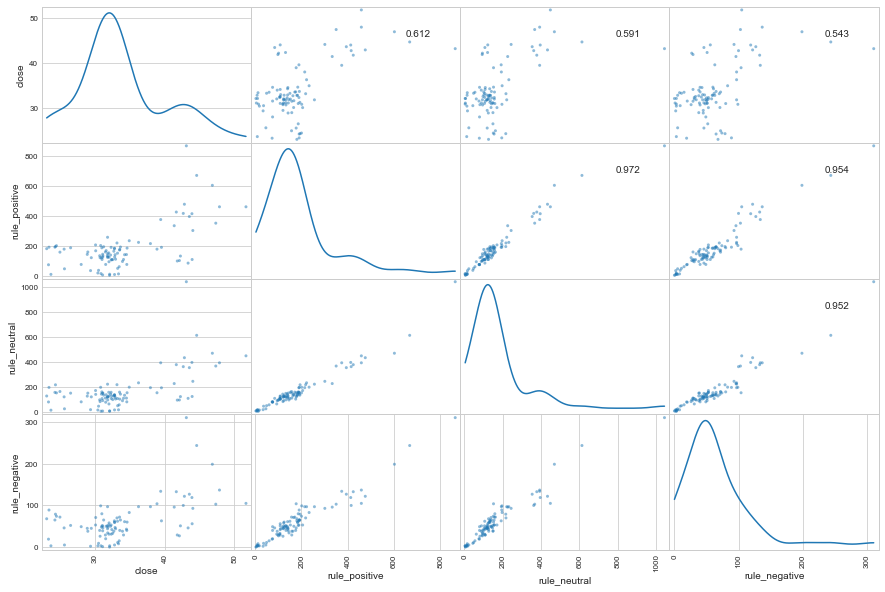

In [173]:
plot_df = data[['close', 'rule_positive', 'rule_neutral', 'rule_negative']]
from pandas.tools.plotting import scatter_matrix
axes = scatter_matrix(plot_df, alpha=0.5, diagonal='kde', figsize=(15, 10))
corr = plot_df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.style.use('seaborn-whitegrid')
plt.show()

/Users/andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


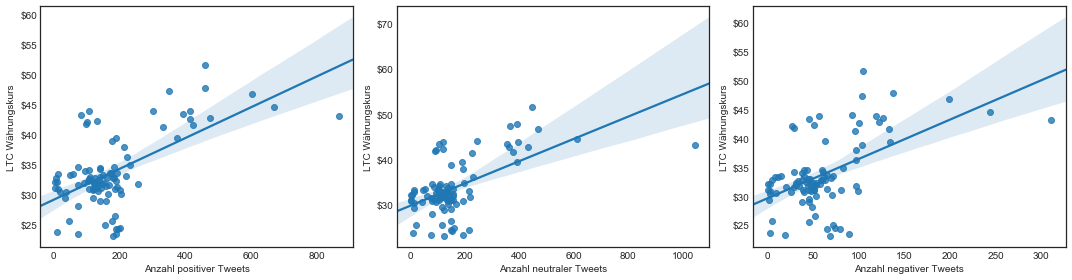

In [223]:
import seaborn as sns
from scipy.stats import pearsonr

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

plt.style.use('seaborn-white')
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
pdf = data[['close', 'rule_positive']]
ax = sns.regplot(x="rule_positive", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Anzahl positiver Tweets', ylabel='LTC Währungskurs')

plt.subplot(1, 3, 2)
pdf = data[['close', 'rule_neutral']]
ax = sns.regplot(x="rule_neutral", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Anzahl neutraler Tweets', ylabel='LTC Währungskurs')

plt.subplot(1, 3, 3)
pdf = data[['close', 'rule_negative']]
ax = sns.regplot(x="rule_negative", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Anzahl negativer Tweets', ylabel='LTC Währungskurs')

plt.tight_layout()
plt.show()

/Users/andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


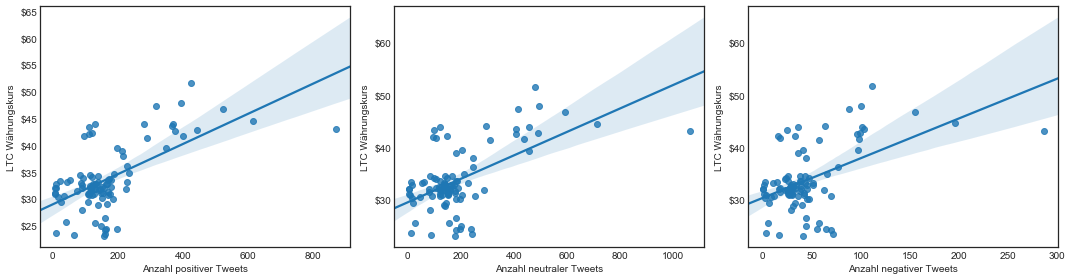

In [225]:
import seaborn as sns
from scipy.stats import pearsonr

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

plt.style.use('seaborn-white')
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
pdf = data[['close', 'ml_positive']]
ax = sns.regplot(x="ml_positive", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Anzahl positiver Tweets', ylabel='LTC Währungskurs')

plt.subplot(1, 3, 2)
pdf = data[['close', 'ml_neutral']]
ax = sns.regplot(x="ml_neutral", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Anzahl neutraler Tweets', ylabel='LTC Währungskurs')

plt.subplot(1, 3, 3)
pdf = data[['close', 'ml_negative']]
ax = sns.regplot(x="ml_negative", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Anzahl negativer Tweets', ylabel='LTC Währungskurs')

plt.tight_layout()
plt.show()

/Users/andy/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


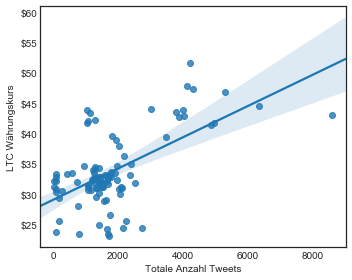

In [229]:
import seaborn as sns
from scipy.stats import pearsonr

def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

plt.style.use('seaborn-white')
plt.figure(figsize=(5, 4))

pdf = data[['close', 'total_tweets']]
ax = sns.regplot(x="total_tweets", y="close", data=pdf, ci=95)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}')) 
#ax.set_title('Capsicum')
ax.set(xlabel='Totale Anzahl Tweets', ylabel='LTC Währungskurs')

plt.tight_layout()
plt.show()

In [18]:
correlations = data_for_correlations.corr()

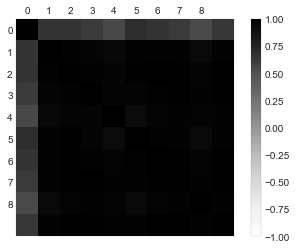

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [20]:
data_for_correlations.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [21]:
data.head(2)

close   high    low   open  volumefrom     volumeto  total_tweets  \
date                                                                            
2018-11-30  31.85  34.28  31.02  33.68   508769.54  16439613.16          1538   
2018-12-01  34.12  35.05  31.20  31.85   386491.64  12892097.81          1304   

            rule_positive  rule_neutral  rule_negative      ...       \
date                                                        ...        
2018-11-30            146            94             34      ...        
2018-12-01            108           108             29      ...        

            ml_negative      ml_sum  ml_rule_positive  ml_rule_neutral  \
date                                                                     
2018-11-30           23  180.561893                82               40   
2018-12-01           24  161.631865                62               47   

            ml_rule_negative  day_changerate   day_volume  ml_diff  rule_diff  \
date                                                                            
2018-11-30                 7       -5.433492 -15930843.62    108.0      112.0   
2018-12-01                 9        7.127159 -12505606.17     97.0       79.0   

            ml_rule_diff  
date                      
2018-11-30          75.0  
2018-12-01          53.0  

[2 rows x 23 columns]

In [22]:
import pandas as pd
import numpy as np

corr = data_for_correlations.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

In [23]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data_for_correlations.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [24]:
from scipy.stats import pearsonr

In [25]:
(corr_coef, p_value) = pearsonr(data['close'], data['total_tweets'])
if(p_value <= 0.05):
    print('Signifikant!')
else:
    print('Nicht Signifikant!')

Signifikant!


In [26]:
pearsonr(data['close'], data['volumefrom'])

(0.12172723176909497, 0.27596786137411683)

In [27]:
def cross_correlation(target_series, comparision_series, max_time_lag=20):
    highest_corr = 0
    highest_corr_p_val = -1
    highest_corr_time_lag = -1 
    
    for time_lag in range (0, max_time_lag):
        periods_to_shift = time_lag * (-1)
        copy = comparision_series.shift(periods=periods_to_shift)
        
        x = target_series
        y = copy
        
        bad_indexes = ~np.logical_or(np.isnan(x), np.isnan(y))

        x = np.compress(bad_indexes, x)
        y = np.compress(bad_indexes, y)
        
        (corr, p_value) = pearsonr(x, y)
        
        print("\ttime_lag = {0}, corr = {1}, p = {2}".format(time_lag, corr, p_value))
        
        if abs(corr) > abs(highest_corr):
            highest_corr = corr
            highest_corr_p_val = p_value
            highest_corr_time_lag = time_lag
    print()
    print("Beste Korrelation bei time lag = {0}".format(highest_corr_time_lag))
    print("Korrelationskoeffizient = {0}".format(highest_corr))
    print("p Wert = {0}".format(highest_corr_p_val))        

In [283]:
cross_correlation(data['total_tweets'], data['ml_positive'])

	time_lag = 0, corr = 0.9427969537236605, p = 1.0200034824996668e-32
	time_lag = 1, corr = 0.6624877044113816, p = 1.3723414994618521e-09
	time_lag = 2, corr = 0.43939532532804937, p = 0.00025033887837752866
	time_lag = 3, corr = 0.34647355610554387, p = 0.005037955646722976
	time_lag = 4, corr = 0.24103208999920017, p = 0.057042768680701315
	time_lag = 5, corr = 0.17673670643669284, p = 0.16939515523668922
	time_lag = 6, corr = 0.12263601322783939, p = 0.34641633735117205
	time_lag = 7, corr = 0.08032286091028032, p = 0.5418107582644924
	time_lag = 8, corr = 0.0018195603533558127, p = 0.9890874543937942
	time_lag = 9, corr = 0.023773528213920567, p = 0.8594004186326857
	time_lag = 10, corr = -0.025327974131266945, p = 0.8516484751530313
	time_lag = 11, corr = -0.09841725450555694, p = 0.4705213844345588
	time_lag = 12, corr = -0.17326896779575837, p = 0.20584402457501857
	time_lag = 13, corr = -0.2236017619357819, p = 0.10409101628863021
	time_lag = 14, corr = -0.24154586647100698, p 

In [280]:
cross_correlation(data['ml_positive'], data['close'])

	time_lag = 0, corr = 0.39788794624914164, p = 0.0008548949294462583
	time_lag = 1, corr = 0.27387054545082784, p = 0.026070861237103338
	time_lag = 2, corr = 0.16971009739277307, p = 0.17652725821914445
	time_lag = 3, corr = 0.05202070755599633, p = 0.6830974979178843
	time_lag = 4, corr = -0.12486187729684715, p = 0.3295418724292307
	time_lag = 5, corr = -0.15473336859254083, p = 0.22981917919337666
	time_lag = 6, corr = -0.13880884297819954, p = 0.2860266829209003
	time_lag = 7, corr = -0.1704950293613388, p = 0.19277036810496806
	time_lag = 8, corr = -0.16175664861978015, p = 0.22096284754289836
	time_lag = 9, corr = -0.039525581137465654, p = 0.768314589435333
	time_lag = 10, corr = -0.1303381341067515, p = 0.33386359592716863
	time_lag = 11, corr = -0.14997502991980916, p = 0.2699180247473632
	time_lag = 12, corr = -0.17248803630983453, p = 0.20792665557352435
	time_lag = 13, corr = -0.27402867517031193, p = 0.04494854203399185
	time_lag = 14, corr = -0.3110801184712065, p = 0.02